In [1]:
import matplotlib.pyplot as plt
import numpy as np
import analyze_eq_potential_mappings as analysis

### Notes
- h -> 0.12

In [2]:
mappings = analysis.load_h_varied_data("./data/h/eq-potential-mapping/*.json")
raw_data = analysis.get_aggregate_h_symetrized_potentials(mappings)
ref_data = raw_data[0]
print(f'h reference: {ref_data["h"]}, shape reference {ref_data["shape"]}')

h reference: 0.12, shape reference (1, 80, 80, 80)


### Same Grid

In [3]:
data = analysis.create_data(raw_data)
data

{'h': [0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2],
 'mean_abs_err': array([7.75161356e-05, 1.21394089e-04, 1.55414527e-04, 2.00069932e-04,
        2.60587429e-04, 3.37743006e-04, 4.40462438e-04, 5.68573336e-04,
        5.68573336e-04]),
 'max_abs_diff': array([0.00312384, 0.00362551, 0.00610559, 0.00767123, 0.00473849,
        0.01181407, 0.01440425, 0.00717493, 0.00717493])}

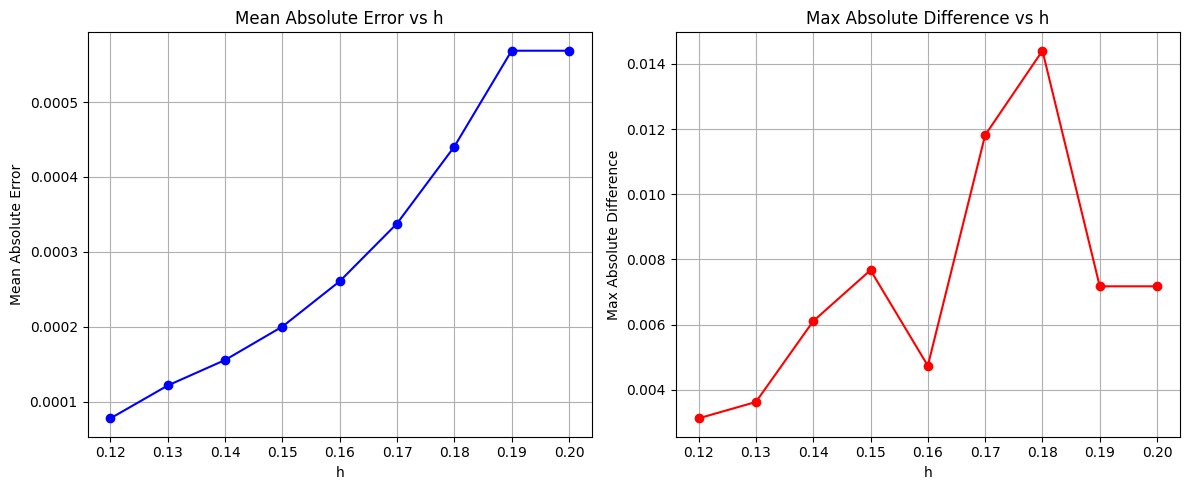

In [4]:
h = data['h']
mean_abs_err = data['mean_abs_err']
max_abs_diff = data['max_abs_diff']

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot mean absolute error
axs[0].plot(h, mean_abs_err, marker='o', color='blue')
axs[0].set_xlabel('h')
axs[0].set_ylabel('Mean Absolute Error')
axs[0].set_title('Mean Absolute Error vs h')
axs[0].grid(True)

# Plot max absolute difference
axs[1].plot(h, max_abs_diff, marker='o', color='red')
axs[1].set_xlabel('h')
axs[1].set_ylabel('Max Absolute Difference')
axs[1].set_title('Max Absolute Difference vs h')
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Grid Interpolation

In [16]:
data_interpolated = analysis.create_data_interpolated(ref_data, raw_data[1:])
data_interpolated

{'h': [0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2],
 'ref_sum': array([-0.25004065, -0.25040188, -0.25081276, -0.25128009, -0.25180259,
        -0.25242349, -0.253144  , -0.253144  ]),
 'sym_sum': array([-0.24942446, -0.2494243 , -0.2494241 , -0.24942452, -0.24942337,
        -0.24942275, -0.24941961, -0.24941961]),
 'mean_abs_err': array([0.00707869, 0.01124119, 0.01592451, 0.02123085, 0.02728282,
        0.03426628, 0.04240263, 0.04240263]),
 'max_abs_diff': array([0.06780324, 0.10511683, 0.14708185, 0.20065645, 0.25322339,
        0.30352558, 0.38559451, 0.38559451])}

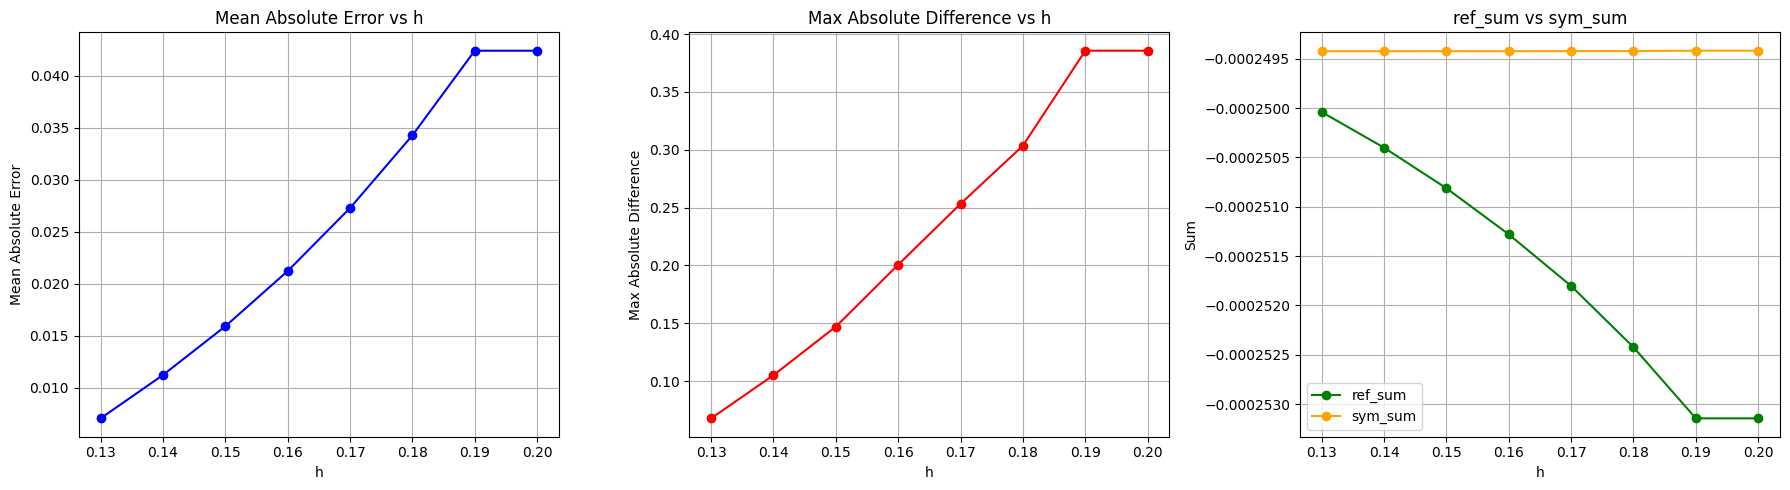

In [18]:
h = data_interpolated['h']
mean_abs_err = data_interpolated['mean_abs_err']
max_abs_diff = data_interpolated['max_abs_diff']
ref_sum = data_interpolated['ref_sum'] * 1e-3
sym_sum = data_interpolated['sym_sum'] * 1e-3

# Create side-by-side plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot mean absolute error
axs[0].plot(h, mean_abs_err, marker='o', color='blue')
axs[0].set_xlabel('h')
axs[0].set_ylabel('Mean Absolute Error')
axs[0].set_title('Mean Absolute Error vs h')
axs[0].grid(True)

# Plot max absolute difference
axs[1].plot(h, max_abs_diff, marker='o', color='red')
axs[1].set_xlabel('h')
axs[1].set_ylabel('Max Absolute Difference')
axs[1].set_title('Max Absolute Difference vs h')
axs[1].grid(True)

# Plot ref_sum and sym_sum
axs[2].plot(h, ref_sum, marker='o', color='green', label='ref_sum')
axs[2].plot(h, sym_sum, marker='o', color='orange', label='sym_sum')
axs[2].set_xlabel('h')
axs[2].set_ylabel('Sum')
axs[2].set_title('ref_sum vs sym_sum')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


### Convergence

In [19]:
d_varied_mappings = analysis.load_d_varied_data("./data/d/eq-potential-mapping/*.json")
raw_d_data = analysis.get_aggregate_d_symetrized_potentials(d_varied_mappings)
ref_data = raw_d_data[0]
print(f'd reference: {ref_data["d"]}, shape reference {ref_data["shape"]}')

d reference: 1e-06, shape reference (1, 48, 48, 48)


In [20]:
data = analysis.create_d_data(raw_d_data)
data

{'d': [1e-06, 2.575e-05, 5.05e-05, 7.525e-05, 0.0001],
 'mean_abs_err': array([0.00056857, 0.00056859, 0.00056859, 0.00056859, 0.00056859]),
 'max_abs_diff': array([0.00717493, 0.00717493, 0.00717493, 0.00717493, 0.00717493])}

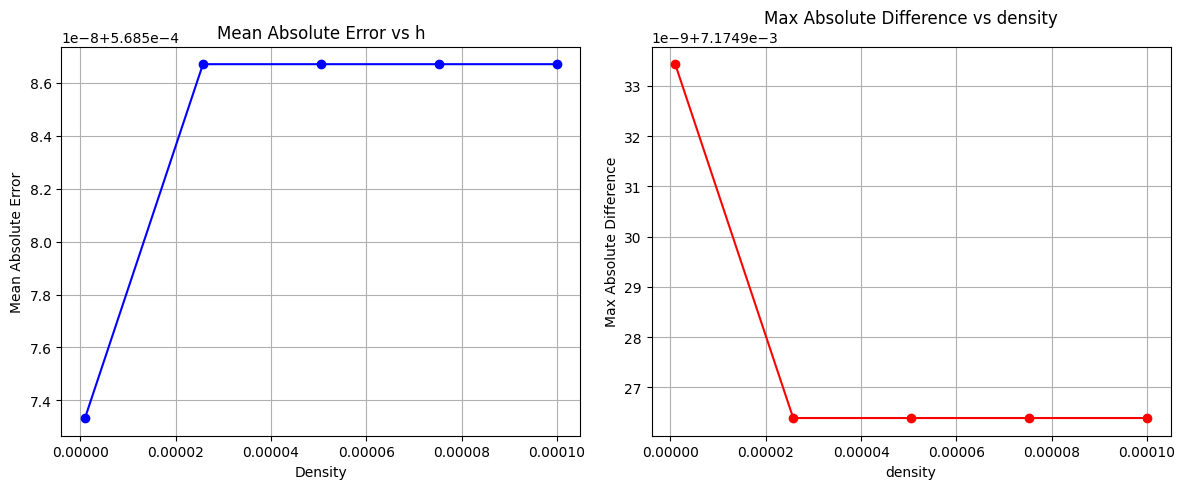

In [23]:
d = data['d']
mean_abs_err = data['mean_abs_err']
max_abs_diff = data['max_abs_diff']

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot mean absolute error
axs[0].plot(d, mean_abs_err, marker='o', color='blue')
axs[0].set_xlabel('Density')
axs[0].set_ylabel('Mean Absolute Error')
axs[0].set_title('Mean Absolute Error vs h')
axs[0].grid(True)

# Plot max absolute difference
axs[1].plot(d, max_abs_diff, marker='o', color='red')
axs[1].set_xlabel('density')
axs[1].set_ylabel('Max Absolute Difference')
axs[1].set_title('Max Absolute Difference vs density')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Change the spacing in between points and have them converge after ~ same iteratioons

In [22]:
data['mean_abs_err']

array([0.00056857, 0.00056859, 0.00056859, 0.00056859, 0.00056859])

In [24]:
data['max_abs_diff']

array([0.00717493, 0.00717493, 0.00717493, 0.00717493, 0.00717493])

In [10]:
d

[1e-06, 2.575e-05, 5.05e-05, 7.525e-05, 0.0001]